*week 2 exercise - part 1*

# Basic Charts with Matplotlib

## Matplotlib

First, we import the required libraries, using standard conventions. We first import numpy for all our mathematical needs, then the matplotlib as plotting library and pyplot which gives an easy API to create plots with matplotlib. Later we will introduce Seaborn as well.

In [414]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# we need the following line to indicate that the plots should be shown inline with the Jupyter notebook.
%matplotlib inline 

We will first create a simple plot of a mathematical function. We first create a numpy array of x-values. Then for each x-value we create the y-value, i.e. the function value. Plotting this function is as easy as giving it the x and y values.

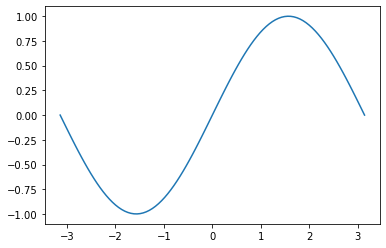

In [415]:
X = np.linspace(-np.pi, np.pi, 100) # define a NumPy array with 100 points in the range -Pi to Pi
Y = np.sin(X)  # define the curve Y by the sine of X

plt.plot(X,Y); # use matplotlib to plot the function

While creating such plots is perfectly fine when you are exploring data, in your final notebook the plot is hard to understand for the reader. With matplotlib it is very easy to add labels, a title and a legend. You can also change the limits of the plot, the style of the lines and much more.

The following could be seen as the bare minimum for a plot to be understood as part of reproducible research.

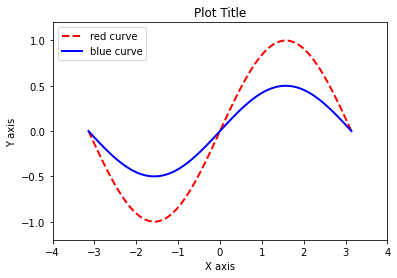

In [416]:
plt.plot(X, Y, 'r--', linewidth=2)
plt.plot(X, Y/2, 'b-', linewidth=2)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Plot Title')
plt.xlim(-4, 4)
plt.ylim(-1.2, 1.2)
plt.legend(['red curve', 'blue curve'], loc='best')

Go to the documentation pages of Matplotlib [http://matplotlib.org/contents.html](http://matplotlib.org/contents.html) to find all the possible options for a plot and also to see more tutorials, videos and book chapters to help you along the way.

Another nice tutorials:
* [http://www.labri.fr/perso/nrougier/teaching/matplotlib/](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

This assignment first shows you how to download csv data from an online source. Then we're exploring a dataset of all the cities in the world and compare cities in The Netherlands to the rest of the world.

## Loading data CSV and Pandas
We will work with a database of information about cities around the world:

[https://dev.maxmind.com/geoip/geoip2/geolite2/](https://dev.maxmind.com/geoip/geoip2/geolite2/)

Working with data structures can be done in many ways in Python. There are the standard Python arrays, lists and tuples. You can also use the arrays in the numpy package which allow you to do heavy math operations efficiently. For data analysis Pandas is often used, because data can be put into so-called dataframes. Dataframes store data with column and row names and can easily be manipulated and plotted. You will learn more about Pandas in the Machine Learning workshops. A short intro can be found here:

https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [417]:
import urllib.request as urllib, zipfile, os

url = 'https://github.com/CODAIT/redrock/raw/master/twitter-decahose/src/main/resources/Location/'
filename = 'worldcitiespop.txt.gz'
datafolder = 'data/'

In [418]:
downloaded = urllib.urlopen(url + filename)
buf = downloaded.read()

try:
    os.mkdir(datafolder)
except FileExistsError:
    pass

with open(datafolder + filename, 'wb') as f:
    f.write(buf)

Encoding parameter has to be used because the default encoding scheme is utf-8 while this file has been encoded using latin-1

In [419]:
import pandas as pd
# reading files may cause problems or give errors... Can you explain the use of the encoding parameter?
cities = pd.read_csv(datafolder + filename, sep=',', low_memory=False, encoding = 'ISO-8859-1')

## Data Manipulation

We can take a peek at the data by checking out the final rows of data. Do you see any potential problem with this dataset?

Population would be expected to be a valid number, but as seen for example row 3173953: is not a number

In [420]:
cities.tail()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
3173953,zw,zimre park,Zimre Park,04,NaN,-17.866111,31.213611
3173954,zw,ziyakamanas,Ziyakamanas,00,NaN,-18.216667,27.950000
3173955,zw,zizalisari,Zizalisari,04,NaN,-17.758889,31.010556
3173956,zw,zuzumba,Zuzumba,06,NaN,-20.033333,27.933333
3173957,zw,zvishavane,Zvishavane,07,79876.0,-20.333333,30.033333


In [421]:
cities.sort_values(by='Population', ascending=False).head(10)

,Country,City,AccentCity,Region,Population,Latitude,Longitude
1544449,jp,tokyo,Tokyo,40,31480498.0,35.685000,139.751389
570824,cn,shanghai,Shanghai,23,14608512.0,31.045556,121.399722
1327914,in,bombay,Bombay,16,12692717.0,18.975000,72.825833
2200161,pk,karachi,Karachi,05,11627378.0,24.905600,67.082200
1349146,in,new delhi,New Delhi,07,10928270.0,28.600000,77.200000
1331162,in,delhi,Delhi,07,10928270.0,28.666667,77.216667
2130459,ph,manila,Manila,D9,10443877.0,14.604200,120.982200
2461968,ru,moscow,Moscow,48,10381288.0,55.752222,37.615556
1626528,kr,seoul,Seoul,11,10323448.0,37.598500,126.978300
316800,br,sao paulo,São Paulo,27,10021437.0,-23.473293,-46.665803


By sorting the cities on population we immediately see the entries of a few of the largest cities in the world.

## Assignment 1a
To get an idea of where in the world the cities in the dataset are located, we want to make a scatter plot of the position of all the cities in the dataset.

Don't worry about drawing country borders, just plot the locations of the cities.

Remember to use all the basic plot elements you need to understand this plot.

(-90.0, 90.0)

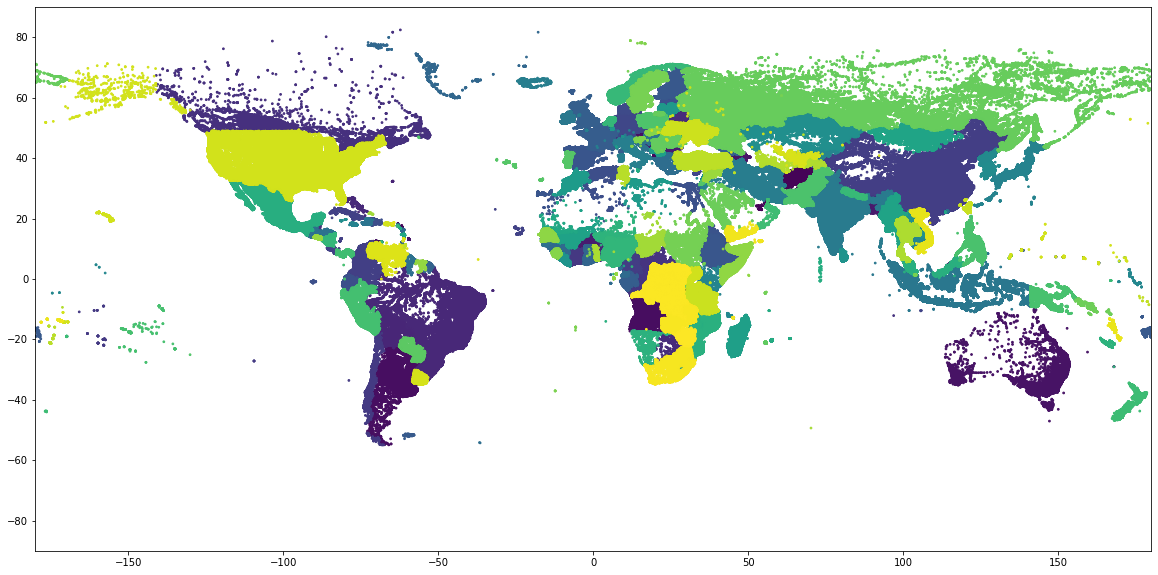

In [422]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

plt.figure(
    figsize=(20,10)
);

## Tried adding image as background but made it less readable
# backgroundImage = plt.imread("world-map.jpg")
# plt.imshow(backgroundImage, zorder=0, extent=[-180, 180, -90, 90])

## Create unique id per country for coloring to seperate countries
cities['Country_id'] = cities.groupby('Country').ngroup()

## Plot the datapoints on a longitude figure and latitude map 
plt.scatter(cities['Longitude'], cities['Latitude'], s=3, c=cities['Country_id'])
plt.xlim(-180, 180)
plt.ylim(-90, 90)

## Assignment 1b

Now we want to plot the cities in The Netherlands only. Use a scatter plot again to plot the cities, but now vary the size of the marker and the color with the population of that city.

Use a colorbar to show how the color of the marker relates to its population.

Use sensible limits to your axes so that you show only mainland The Netherlands (and not the Dutch Antilles).

C:\Programs\Anaconda\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


(50.0, 54.0)

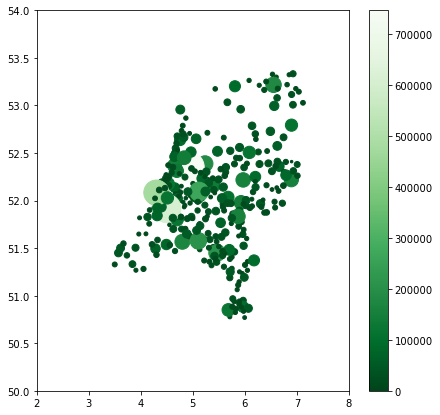

In [423]:
## Remove all NaN here
# cities['Population'].dropna()
dutch_cities = cities[cities['Country'] =='nl']

## replace all NaN in a copy will throw a warning
dutch_cities['Population'].fillna(0, inplace=True)

plt.figure(figsize=[7,7]);

plt.scatter(
    dutch_cities['Longitude'], 
    dutch_cities['Latitude'], 
    s=dutch_cities['Population']/(dutch_cities['Population'].mean()/2),
    c=dutch_cities['Population'],
    cmap='Greens_r')
plt.colorbar()

plt.xlim(2, 8)
plt.ylim(50, 54)

## Assignment 1c

Using assignment B, we could clearly see larger cities such as Amsterdam, Rotterdam and even Eindhoven. But we still do not really have a clear overview of how many big cities there are. To show a distribution we use a histogram plot.

What happens if we do not call the .dropna() function?

Add proper basic plot elements to this plot and try to annotate which data point is Amsterdam and Eindhoven.

Text(250, 0.005, 'Eindhoven')

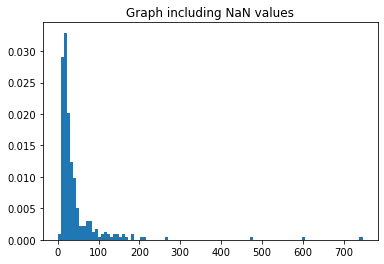

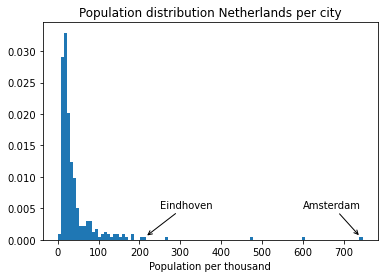

In [424]:
## dutch_cities has been manipulated in the previous assignment
# cities = pd.read_csv(datafolder + filename, sep=',', low_memory=False, encoding = 'ISO-8859-1')
dutch_cities = cities[cities['Country'] =='nl']
# dutch_cities.sort_values(by='Population', ascending=False).head(10)

##I understand that there should be an increase in % for the given data when removing the NaN, but nothing seems to happen
plt.figure();
# print(dutch_cities.isnull().sum())
plt.hist(np.asarray(dutch_cities.Population/1000), 100, density=1);
plt.title('Graph including NaN values')

# dutch_cities = dutch_cities.dropna()
plt.figure();
# print(dutch_cities.isnull().sum())
plt.hist(np.asarray(dutch_cities.Population.dropna()/1000), 100, density=1);
plt.title('Population distribution Netherlands per city')
plt.xlabel('Population per thousand')

# annotations
plt.annotate("Amsterdam",
            xy=(740, 0.0005), xycoords='data',
            xytext=(600, 0.005), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )
plt.annotate("Eindhoven",
            xy=(215, 0.0005), xycoords='data',
            xytext=(250, 0.005), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

## Assignment 1d

Now we want to compare how the distribution of Dutch cities compares to that of the entire world.

Use subplots to show the dutch distribution (top plot) and the world distribution (bottom plot).

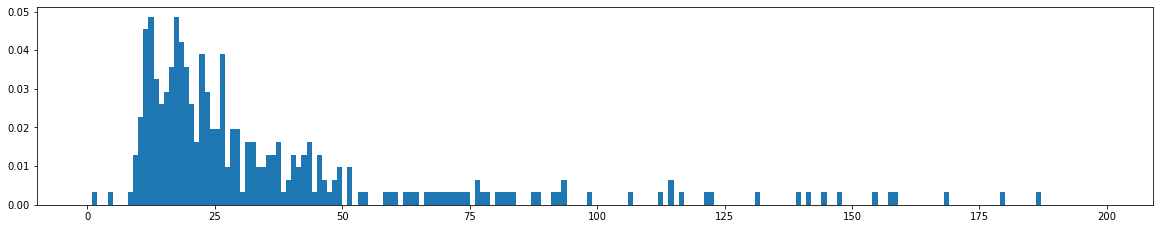

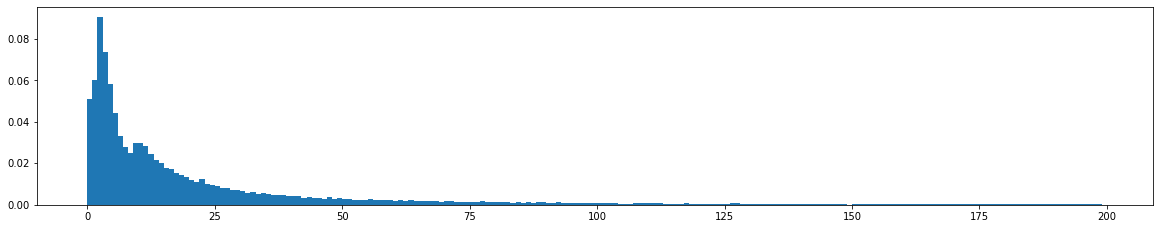

In [425]:
plt.figure(figsize=[20, 8]);
plt.subplot(2,1,1);
plt.hist(np.asarray(dutch_cities.dropna().Population/1000), bins=np.arange(0, 200, 1), density=1);

# Add the subplot of the world cities below this Dutch one
plt.figure(figsize=[20, 8]);
plt.subplot(2,1,1);
plt.hist(np.asarray(cities.dropna().Population/1000), bins=np.arange(0, 200, 1), density=1);

## Assignment 1e

Write what conclusions you can deduce from the above plots?

Dutch cities seem to be more densly populated than in the world, in world there are more cities with low population, while in the Netherlands this is not the case (however depending on how the data was structured it could be that all small towns in the Netherlands had a NaN for population and thus have been removed)

*week 2 exercise - part 2*

# Data visualization: Two additional Chart Types for Exploring

This assignment first shows two useful chart types: parallel coordinates and scatter matrix. You will practice these plots using a new dataset.

## Parallel Coordinates with Pandas

First, we import the required libraries, using standard conventions. For the example of parallel coordinates we shall use the famous iris data set, describing the sepal and petal dimensions for three types of irises.

In [426]:
import pandas as pd
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', sep=',', low_memory=False, encoding = 'ISO-8859-1', header=None)
iris.columns = ['sepal width','sepal length','petal width','petal length', 'name']

iris.head()

,sepal width,sepal length,petal width,petal length,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Now we do not use matplotlib directly but use a plot function of the pandas library that uses matplotlib in the background. In this case we create a parallel coordinates plot.

Pandas has many plotting function as can be seen here: http://pandas.pydata.org/pandas-docs/stable/visualization.html#parallel-coordinates

The parallel coordinates plot can give insight into a dataset with a large number of features. For the iris set there are four features (petal width, petal length, sepal width, sepal length).

While you can make a scatter plot with 4 features using x,y,color and size; a parallel coordinates plot is usually easier to understand once you know how to read it. Here would be the scatter plot:

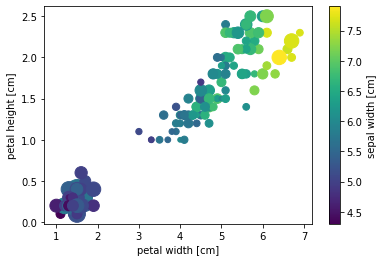

In [427]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

fig = plt.figure()
plt.scatter(iris['petal width'], iris['petal length'], c=iris['sepal width'], s=iris['sepal length']**4)
plt.xlabel('petal width [cm]')
plt.ylabel('petal height [cm]')
plt.colorbar(label='sepal width [cm]');

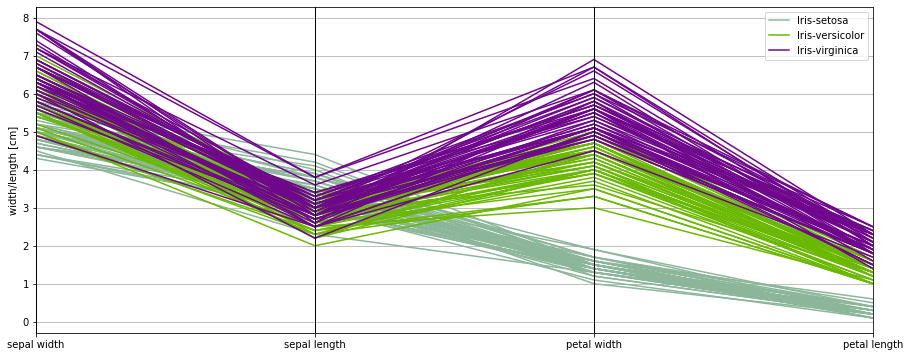

In [428]:
import numpy as np
from matplotlib import pyplot as plt
from pandas.plotting import parallel_coordinates
%matplotlib inline 

fig = plt.figure(figsize=[15,6])
ax = parallel_coordinates(iris,'name')
ax.set_ylabel('width/length [cm]');

## Scatter Matrix with Pandas

A scatter matrix is a chart that gives you an overview of the correlations between any number of feaures.

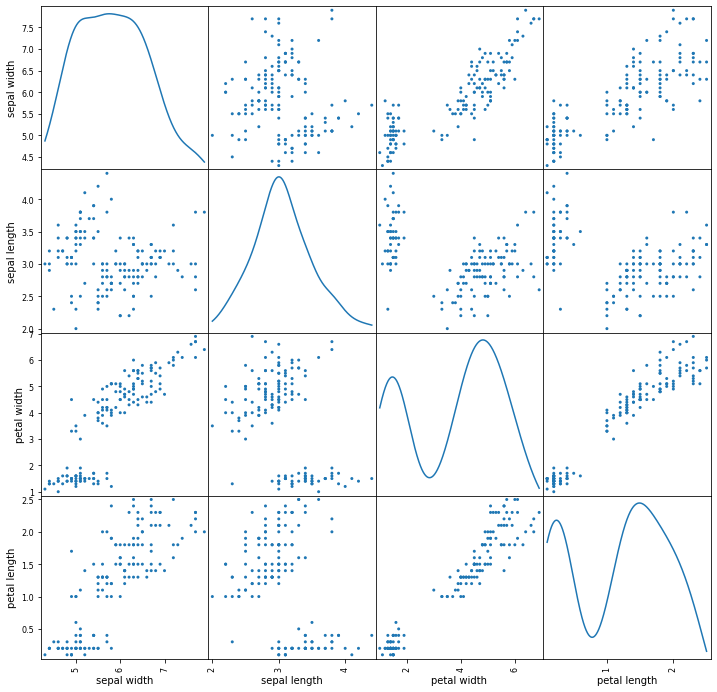

In [429]:
from pandas.plotting import scatter_matrix
scatter_matrix(iris, alpha=1, figsize=(12, 12), diagonal='kde');

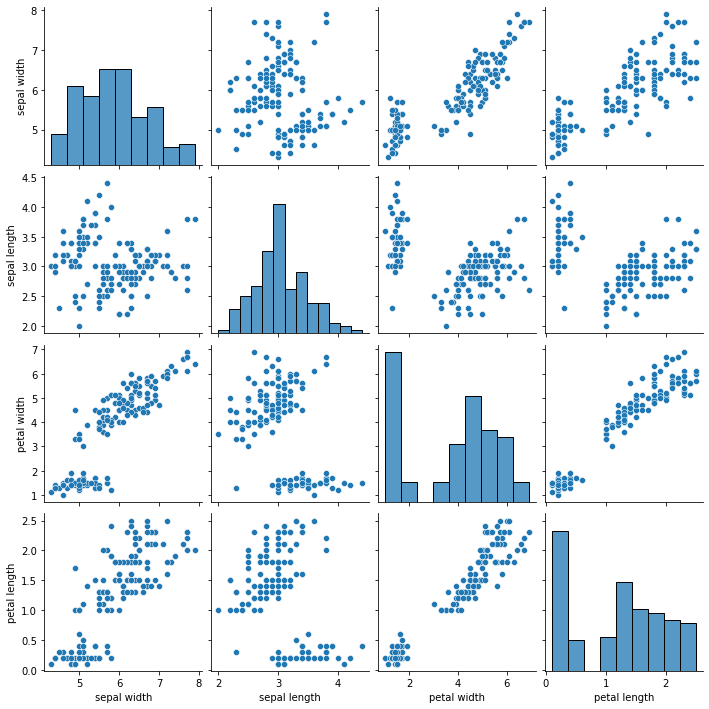

In [430]:
# or see what happens if we use the Seaborn library...
import seaborn as sns
sns.pairplot(iris)

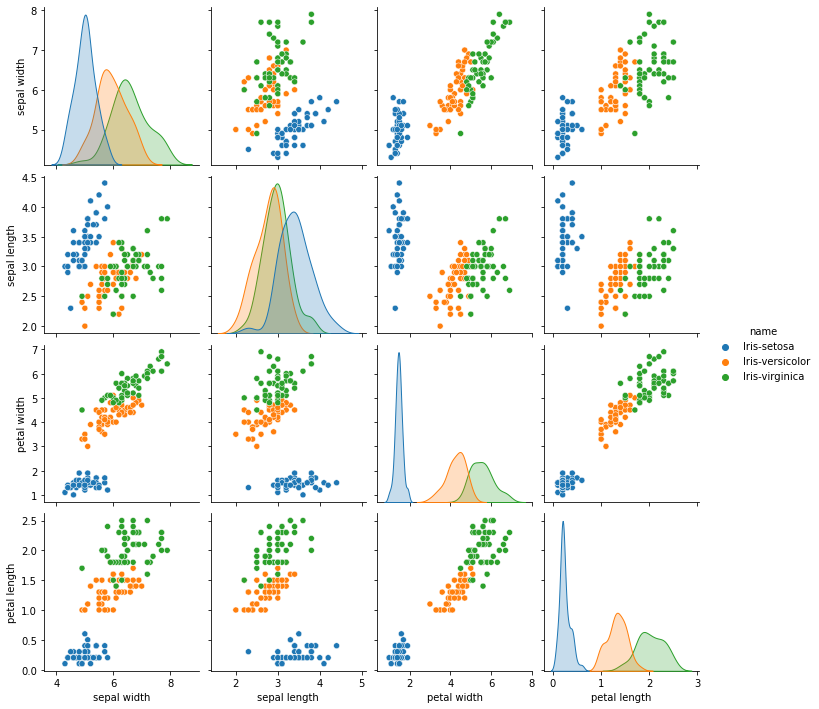

In [431]:
# Seaborn provides some simples ways to explore the data and correlations in more (visual) detail...
import seaborn as sns
sns.pairplot(iris, hue="name")

## Assignment
Now try to create similar plots for a new dataset about car features.

In [432]:
# The data file is quite nasty with several different delimeters that read_csv cannot handle very well
names=['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name','j','k','l','m','n']
cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', delimiter=r"\s+", names=names, header=None, engine='python')
# Create a subset of dataset with all useful features
cars = cars.iloc[:,[0,1,2,4,5,6,7]]

# Create a normalized dataset
using Mean normalization (see: https://en.wikipedia.org/wiki/Feature_scaling#Mean_normalization)

In [433]:
cars_norm = cars.copy() # extend this code to create a normalized set
print(cars.head())

# apply normalization techniques
for col in cars_norm.columns:
    cars_norm[col] = (cars_norm[col] - cars_norm[col].mean()) / (cars_norm[col].max() - cars_norm[col].min())

##undo normalization done to cylinders because i will be using this as the identifier and this way i can still know the original value
cars_norm['cylinders'] = cars['cylinders']
print(cars_norm.head())

    mpg  cylinders  displacement  weight  acceleration  model year  origin
0  18.0          8         307.0  3504.0          12.0          70       1
1  15.0          8         350.0  3693.0          11.5          70       1
2  18.0          8         318.0  3436.0          11.0          70       1
3  16.0          8         304.0  3433.0          12.0          70       1
4  17.0          8         302.0  3449.0          10.5          70       1
        mpg  cylinders  displacement    weight  acceleration  model year  \
0 -0.146664          8      0.293473  0.151283     -0.212386   -0.500838   
1 -0.226451          8      0.404584  0.204870     -0.242148   -0.500838   
2 -0.146664          8      0.321897  0.132003     -0.271910   -0.500838   
3 -0.199856          8      0.285721  0.131153     -0.212386   -0.500838   
4 -0.173260          8      0.280553  0.135689     -0.301672   -0.500838   

     origin  
0 -0.286432  
1 -0.286432  
2 -0.286432  
3 -0.286432  
4 -0.286432  


Next, create a parallel coordinates plot. What happens when you do not use the normalized data?

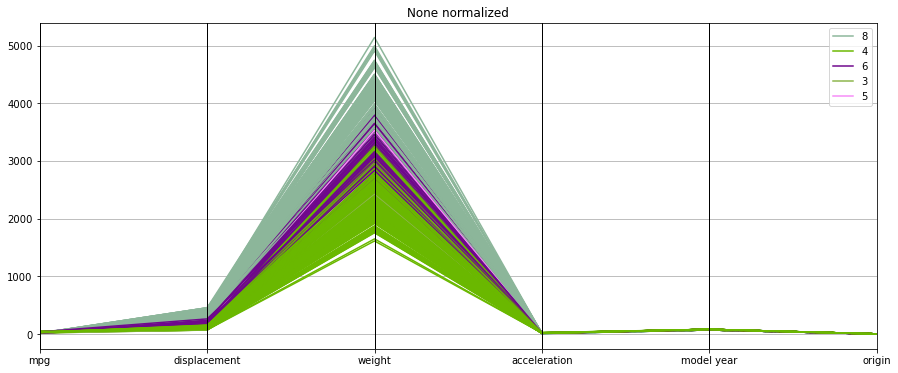

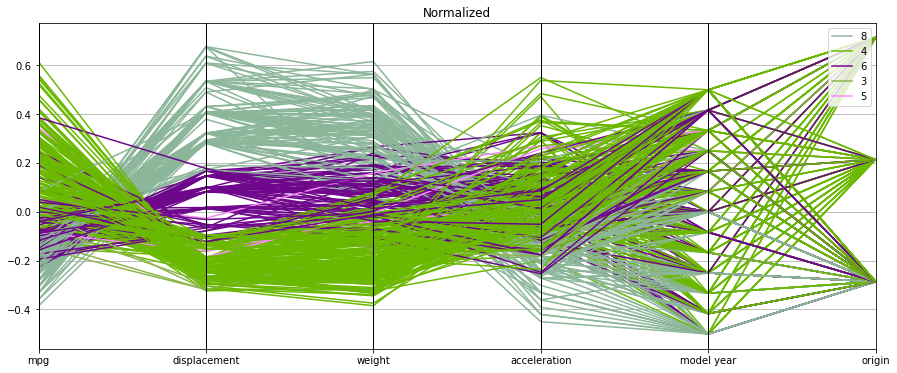

In [434]:
## Create the parallel coordinates plot here
fig = plt.figure(figsize=[15,6])
ax = parallel_coordinates(cars,'cylinders')
ax.set_title('None normalized');  

fig = plt.figure(figsize=[15,6])
ax = parallel_coordinates(cars_norm,'cylinders')
ax.set_title('Normalized');  

Answer this question: What conclusions can you make from the relation between weight and acceleration? If you don't understand how to interpret parallel coordinates plots, read: https://eagereyes.org/techniques/parallel-coordinates.


## Answer here in Markdown
The lines cross alot which suggests an inverse relation, this would mean that the lower the weight the higher the acceleration and vice versa


Next, try to highlight the model years >= 80. 

Hints: 
* you can slice your data with ```cars_norm[cars['model year']>=80]```.
* you can plot both all data and the sliced data on top of each other with different colors  

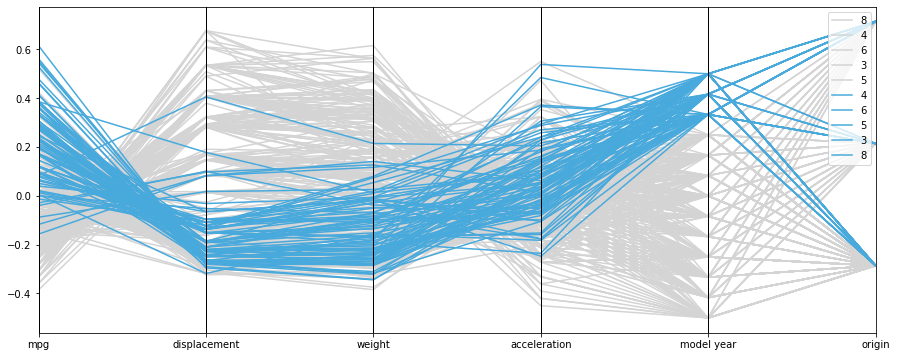

In [435]:
## Create the parallel coordinates plot here
fig = plt.figure(figsize=[15,6])

ax = parallel_coordinates(cars_norm[cars['model year']<80],'cylinders', color='#d4d4d4')

## highlighted data
ax = parallel_coordinates(cars_norm[cars['model year']>=80],'cylinders', color='#48a9dc')

Answer this question: what conclusions can you draw from cars with model years 80-82?

## Answers here in Markdown
These cars where genrally smaller, lighter and more fuel efficient

Now, create a scatter matrix for the car data. 
Do we need to use the normalized data?
Are we looking for a dataset that we can easily cluster or will we get more luck looking for trends?

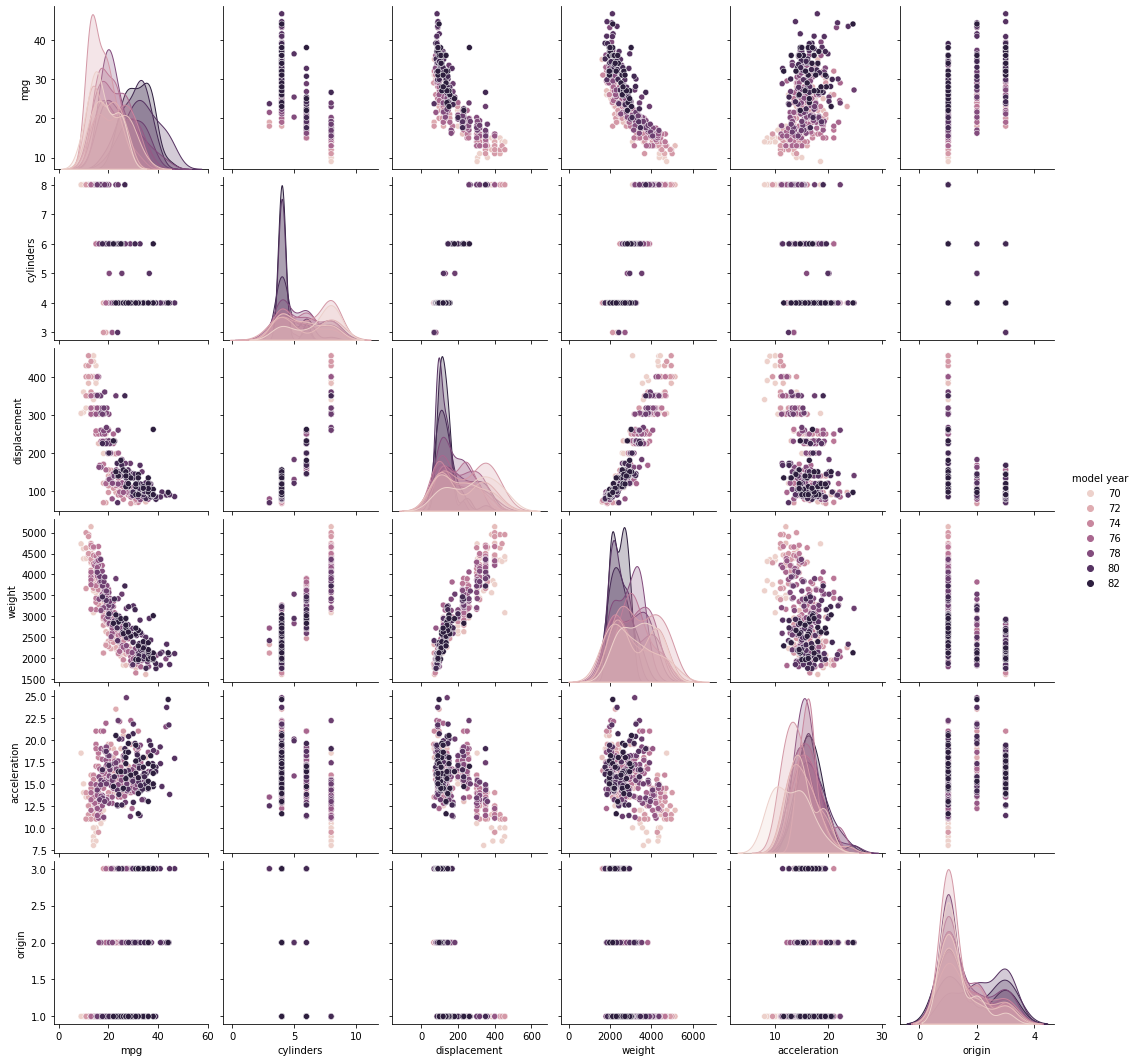

In [436]:
## Create the scatter matrix here
sns.pairplot(cars, hue="model year")

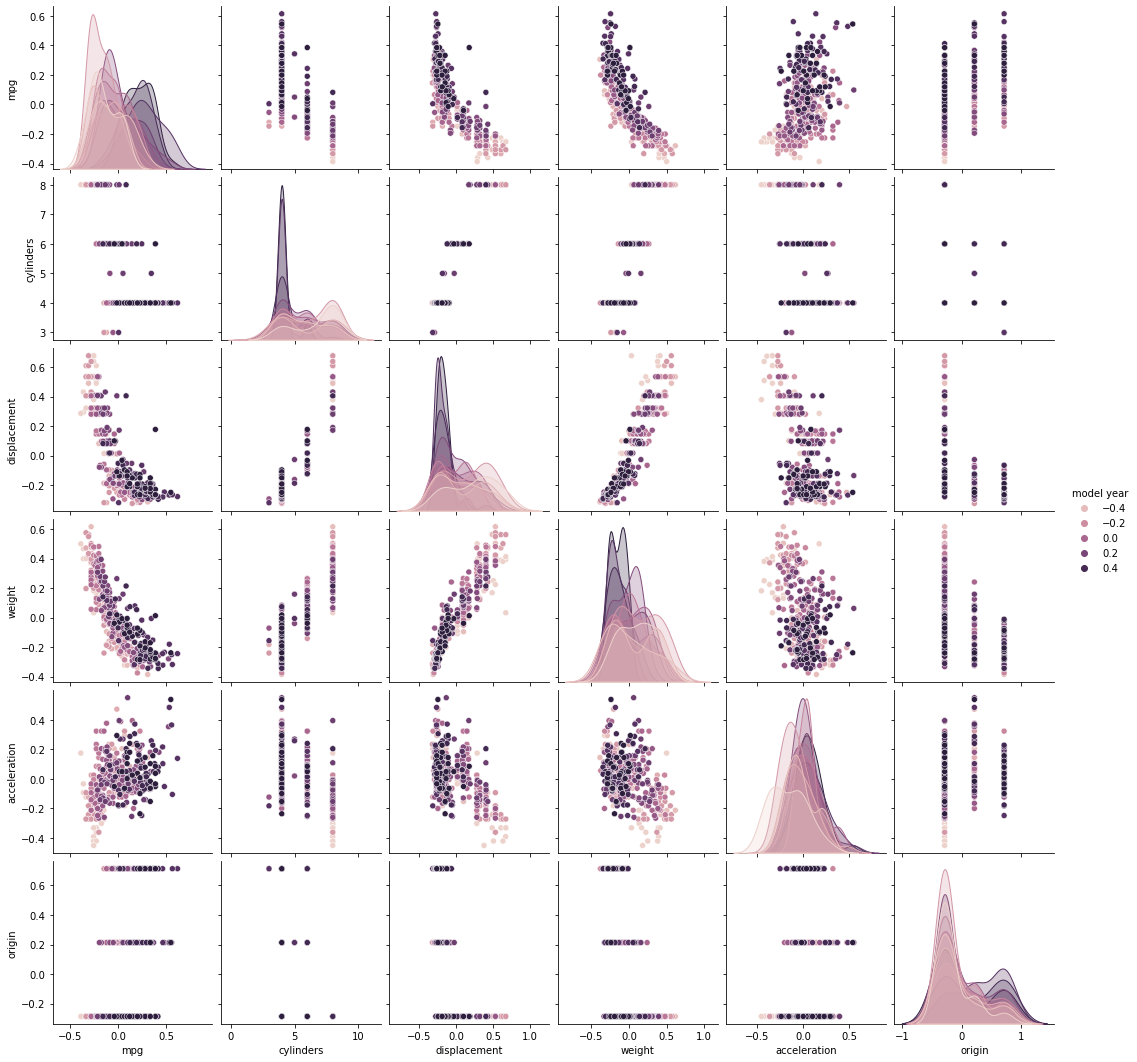

In [437]:
sns.pairplot(cars_norm, hue="model year")

*What are your final conclusions looking at the (visual) results? What did you learn about the data and dataset? Or what new questions did you derive from the plots you've made?*

I notice that there seems to be a clear trend between what the market of cars has been moving towards during the 1970s and early 80s, besides this I can find correlation between values such as cylinders and mpg.  

I do realise that because this dataset is fairly outdated that technologies have improved in the last ~40 years and that this data can not be used for current day application.  
Also for instance factors such as wear over time between cars with different cylinders and the depreciation of these cars has not been recorded which could have been a usefull insight because now it seems that lower cylinder counts tend to be better in all ways that a person would want (e.g. high mpg, high acceleration, smaller displacement)